In [106]:
# Import libraries

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure 

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

# Read in the data
df = pd.read_csv('movies.csv')

In [107]:
pd.set_option('display.max_rows',15)

In [108]:
for col in df.columns:
    count = df[col].isna().sum()
    print(f'{col} - {count} missing')

name - 0 missing
rating - 77 missing
genre - 0 missing
year - 0 missing
released - 2 missing
score - 3 missing
votes - 3 missing
director - 0 missing
writer - 3 missing
star - 1 missing
country - 3 missing
budget - 2171 missing
gross - 189 missing
company - 17 missing
runtime - 4 missing


In [109]:
# Since there are some missing data, as opposed to the tutorial, they will be dropped
df = df.dropna()

In [110]:
# Data types for columns
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [111]:
# Changing data types
df.budget = df.budget.astype('int64')
df.gross = df.gross.astype('int64')

In [112]:
# Create correct year column

df['year'] = df['released'].str.extract(pat='([0-9]{4})').astype(int)

In [113]:
df = df.sort_values(by=['gross'], inplace=False, ascending=False)

In [114]:
df.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0
7480,The Lion King,PG,Animation,2019,"July 19, 2019 (United States)",6.9,222000.0,Jon Favreau,Jeff Nathanson,Donald Glover,United States,260000000,1670727580,Walt Disney Pictures,118.0
6653,Jurassic World,PG-13,Action,2015,"June 12, 2015 (United States)",7.0,593000.0,Colin Trevorrow,Rick Jaffa,Chris Pratt,United States,150000000,1670516444,Universal Pictures,124.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6147,About Cherry,R,Drama,2012,"August 9, 2012 (United States)",4.8,10000.0,Stephen Elliott,Stephen Elliott,Ashley Hinshaw,United States,2500000,8315,Enderby Entertainment,98.0
760,Crimewave,PG-13,Comedy,1986,"April 25, 1986 (United States)",5.7,5300.0,Sam Raimi,Ethan Coen,Louise Lasser,United States,3000000,5101,Columbia Pictures,83.0


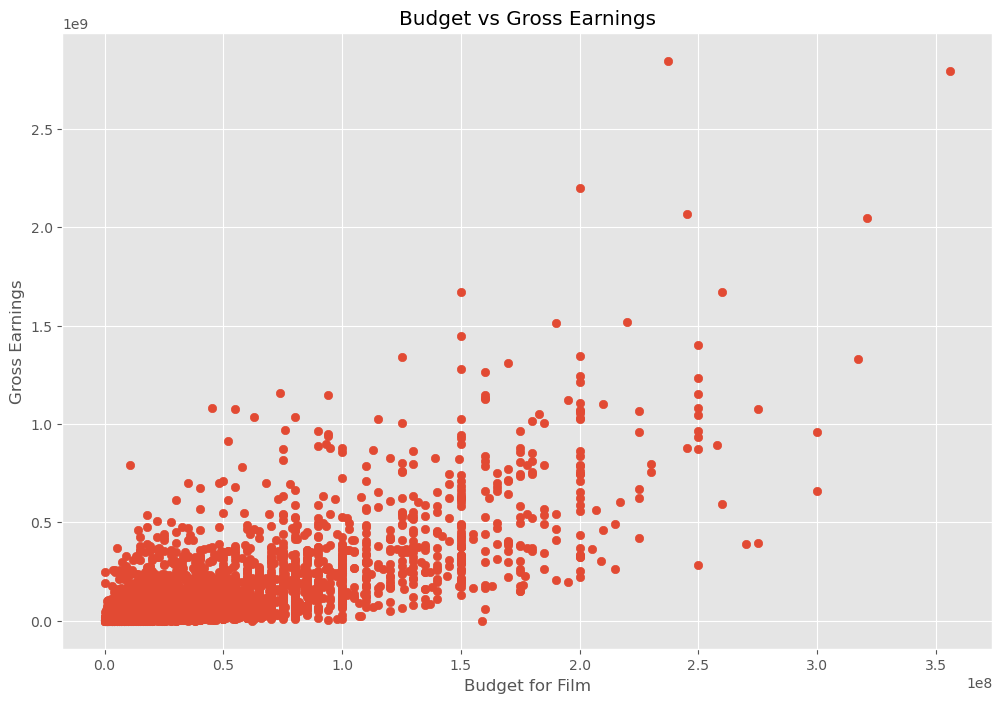

In [115]:
# Budget correlation
# scatter plot with budget vs gross revenue

plt.scatter(x = df.budget, y = df.gross)
plt.title('Budget vs Gross Earnings')
plt.xlabel('Budget for Film')
plt.ylabel('Gross Earnings')

plt.show()

<Axes: xlabel='budget', ylabel='gross'>

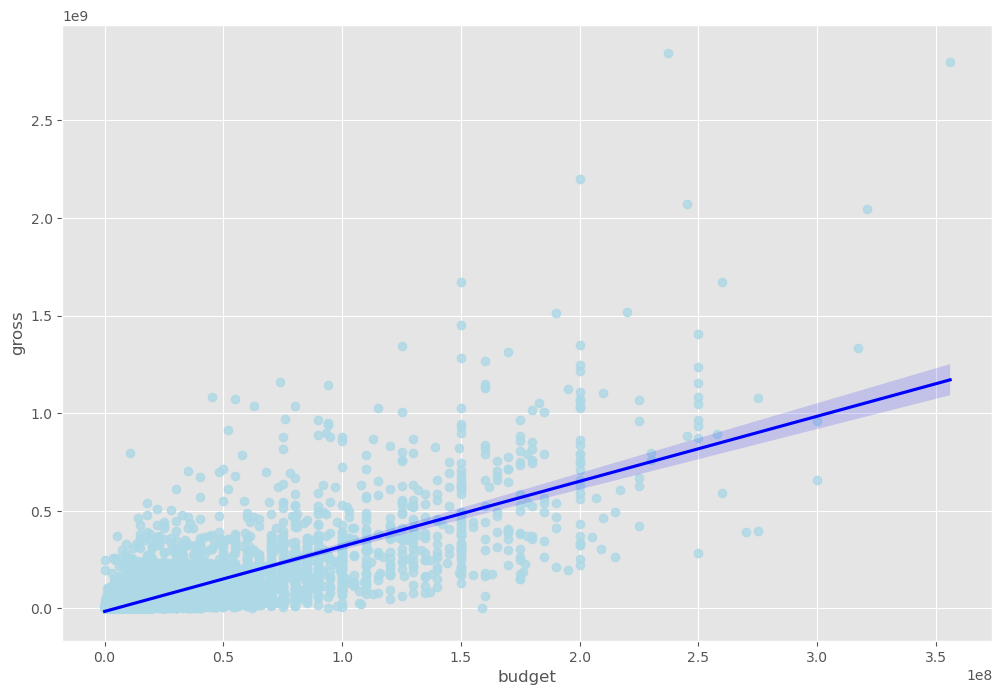

In [116]:
# Plot budget vs gross using seaborn

sns.regplot(x = df.budget, y = df.gross, data = df, scatter_kws = {'color': 'lightblue'}, line_kws = {'color': 'blue'})

In [117]:
df.corr(method = 'pearson', numeric_only=True) 

,year,score,votes,budget,gross,runtime
year,1.000000,0.061923,0.203098,0.320312,0.268721,0.075294
score,0.061923,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.203098,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.320312,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.268721,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.075294,0.414068,0.352303,0.318695,0.275796,1.000000


In [118]:
# High correlation between budget and gross = 0.740247

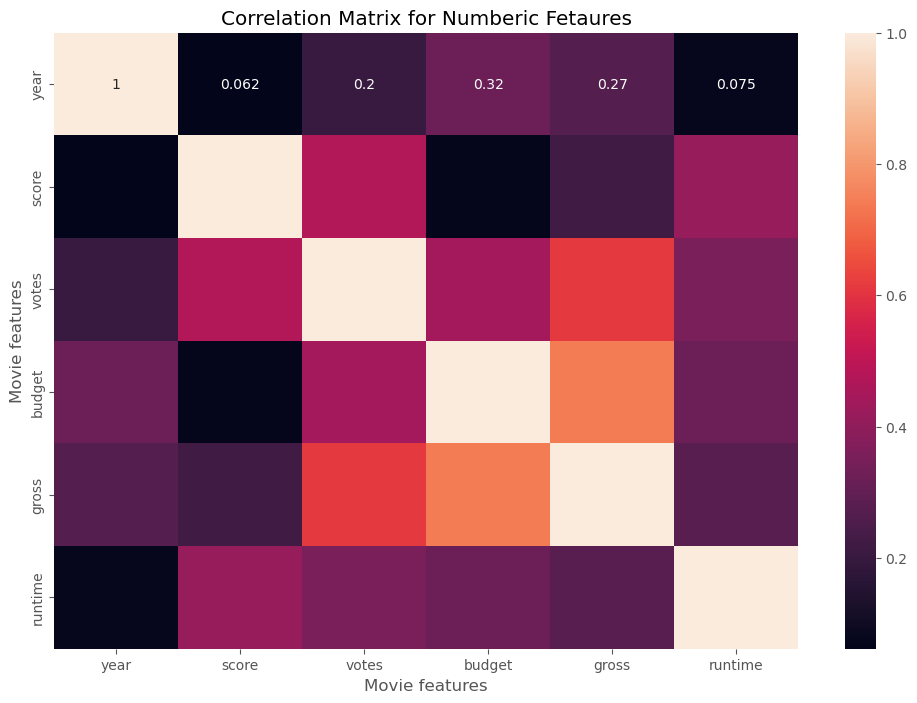

In [121]:
correlation_matrix = df.corr(method = 'pearson', numeric_only=True) 

sns.heatmap(correlation_matrix, annot = True)

plt.title('Correlation Matrix for Numberic Fetaures')
plt.xlabel('Movie features')
plt.ylabel('Movie features')
plt.show()

In [123]:
# Company correlation
df_numerised = df

for col_name in df_numerised.columns:
    if(df_numerised[col_name].dtype == 'object'):
        df_numerised[col_name] = df_numerised[col_name].astype('category')
        df_numerised[col_name] = df_numerised[col_name].cat.codes

df_numerised.head()



,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,386,5,0,2009,527,7.8,1100000.0,785,1263,1534,47,237000000,2847246203,1382,162.0
7445,388,5,0,2019,137,8.4,903000.0,105,513,1470,47,356000000,2797501328,983,181.0
3045,4909,5,6,1997,534,7.8,1100000.0,785,1263,1073,47,200000000,2201647264,1382,194.0
6663,3643,5,0,2015,529,7.8,876000.0,768,1806,356,47,245000000,2069521700,945,138.0
7244,389,5,0,2018,145,8.4,897000.0,105,513,1470,47,321000000,2048359754,983,149.0


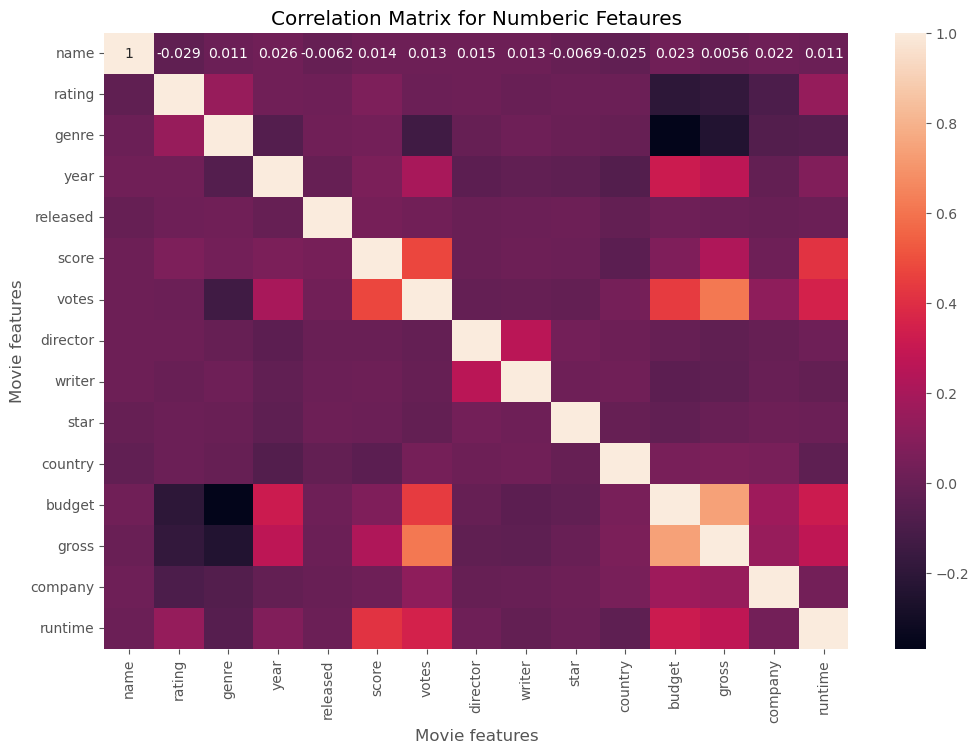

In [124]:
# Correlation
correlation_matrix = df_numerised.corr(method = 'pearson', numeric_only=True) 

sns.heatmap(correlation_matrix, annot = True)

plt.title('Correlation Matrix for Numberic Fetaures')
plt.xlabel('Movie features')
plt.ylabel('Movie features')
plt.show()

In [126]:
corr_mat = df_numerised.corr()
corr_pairs = corr_mat.unstack()
sorted_corr_pairs = corr_pairs.sort_values()
sorted_corr_pairs

budget    genre      -0.368523
genre     budget     -0.368523
gross     genre      -0.244101
genre     gross      -0.244101
budget    rating     -0.203946
rating    budget     -0.203946
gross     rating     -0.181906
                        ...   
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
Length: 225, dtype: float64

In [127]:
high_corr = sorted_corr_pairs[(sorted_corr_pairs) > 0.5]
high_corr

votes     gross       0.614751
gross     votes       0.614751
          budget      0.740247
budget    gross       0.740247
name      name        1.000000
director  director    1.000000
gross     gross       1.000000
                        ...   
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
Length: 19, dtype: float64

In [ ]:
# Budget and gross have the highest correlation followed by gross and votes